<a href="https://colab.research.google.com/github/matheus97eng/Bootcamp_Alura_2021/blob/main/modulo-2/aulas/notebooks/aula_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obtendo dados de aulas anteriores

Para melhor organização e reprodução, todos os dados das aulas são retirados [deste repositório](https://github.com/matheus97eng/Bootcamp_Alura_2021/tree/main/modulo-2/aulas/data). Lá você também encontra a descrição de cada um deles. Vamos transformá-los novamente em dataframes.

In [ ]:
import pandas as pd

dados_gastos = 'https://github.com/matheus97eng/Bootcamp_Alura_2021/raw/main/modulo-2/aulas/data/out_gastos_2020-Jul.csv'
gastos_2020_Jul = pd.read_csv(dados_gastos, index_col='Unidade da Federação')
gastos_2020_Jul.head()

,2020/Jul
Unidade da Federação,
35 São Paulo,2.827096e+08
31 Minas Gerais,1.204672e+08
41 Paraná,8.032085e+07
43 Rio Grande do Sul,7.892970e+07
33 Rio de Janeiro,7.154023e+07


In [ ]:
dados = 'https://github.com/matheus97eng/Bootcamp_Alura_2021/raw/main/modulo-2/aulas/data/out_gastos_e_populacao_2020-Jul.csv'
gastos_e_populacao_2020_Jul = pd.read_csv(dados, index_col='uf')
gastos_e_populacao_2020_Jul.head()

,populacao,2020/Jul
uf,,
São Paulo,46289333,2.827096e+08
Minas Gerais,21292666,1.204672e+08
Rio de Janeiro,17366189,7.154023e+07
Bahia,14930634,5.889810e+07
Paraná,11516840,8.032085e+07


In [ ]:
dados = 'https://github.com/matheus97eng/Bootcamp_Alura_2021/raw/main/modulo-2/aulas/data/out_ordenado_por_total%20(1).csv'
ordenado_por_total = pd.read_csv(dados, index_col='Unidade da Federação')
ordenado_por_total.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1.728349e+08,1.704818e+08,1.702783e+08,1.724022e+08,1.754166e+08,1.795250e+08,1.798981e+08,1.800822e+08,1.916852e+08,1.905397e+08,1.770864e+08,1.923216e+08,1.785964e+08,2.169516e+08,2.150530e+08,2.128902e+08,2.126709e+08,2.140412e+08,2.152125e+08,2.141354e+08,2.160566e+08,2.089739e+08,1.921271e+08,2.134679e+08,1.957848e+08,2.393239e+08,2.211730e+08,2.317775e+08,2.239338e+08,2.240679e+08,2.480101e+08,2.240530e+08,2.389355e+08,2.254841e+08,2.106115e+08,2.290870e+08,2.215980e+08,2.413999e+08,2.298212e+08,2.507936e+08,...,2.634718e+08,2.921134e+08,2.743011e+08,2.835346e+08,3.005937e+08,2.672972e+08,2.871148e+08,2.671132e+08,2.594517e+08,2.794976e+08,2.540046e+08,2.852706e+08,2.861920e+08,2.914409e+08,2.789260e+08,2.858519e+08,2.954193e+08,2.775762e+08,3.014549e+08,2.781143e+08,2.662398e+08,2.910814e+08,2.676625e+08,2.855763e+08,2.925848e+08,3.089256e+08,2.814051e+08,3.066340e+08,3.023673e+08,2.936857e+08,3.033825e+08,2.823918e+08,2.726977e+08,3.019912e+08,2.713568e+08,2.766063e+08,2.516964e+08,3.028577e+08,2.990609e+08,2.827096e+08
31 Minas Gerais,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,7.960865e+07,8.220022e+07,8.037412e+07,8.240015e+07,8.861348e+07,8.448700e+07,8.892863e+07,9.901816e+07,8.367512e+07,1.002407e+08,9.183133e+07,9.728970e+07,9.572340e+07,1.000500e+08,9.896806e+07,9.820212e+07,9.696239e+07,9.476764e+07,9.241277e+07,9.580656e+07,9.076489e+07,1.073899e+08,1.008298e+08,1.054856e+08,9.966612e+07,1.033570e+08,1.078443e+08,1.043411e+08,1.005254e+08,1.019436e+08,9.953895e+07,1.077389e+08,1.031408e+08,1.110660e+08,1.060943e+08,1.154872e+08,...,1.367151e+08,1.534121e+08,1.442914e+08,1.475335e+08,1.560556e+08,1.422851e+08,1.483061e+08,1.423239e+08,1.383412e+08,1.465016e+08,1.307021e+08,1.514962e+08,1.506876e+08,1.535893e+08,1.502518e+08,1.566340e+08,1.604200e+08,1.459410e+08,1.572476e+08,1.481728e+08,1.453872e+08,1.531773e+08,1.426692e+08,1.519436e+08,1.579226e+08,1.635915e+08,1.541148e+08,1.667357e+08,1.617078e+08,1.574197e+08,1.661338e+08,1.521067e+08,1.523986e+08,1.580979e+08,1.413232e+08,1.470786e+08,1.263306e+08,1.368673e+08,1.359776e+08,1.204672e+08
41 Paraná,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,5.609475e+07,5.980240e+07,5.669900e+07,5.809199e+07,6.136594e+07,5.966721e+07,5.781620e+07,6.038159e+07,5.723910e+07,6.907049e+07,6.405468e+07,6.868554e+07,6.793123e+07,7.095876e+07,6.922578e+07,6.784997e+07,6.855821e+07,6.715850e+07,6.309427e+07,6.690264e+07,6.450113e+07,7.713887e+07,7.075540e+07,7.345676e+07,7.183902e+07,7.301383e+07,7.615101e+07,7.424096e+07,7.304239e+07,7.636475e+07,7.051764e+07,7.471278e+07,7.131474e+07,7.691467e+07,7.423294e+07,8.170902e+07,...,1.060277e+08,1.205353e+08,1.117253e+08,1.185902e+08,1.221228e+08,1.106561e+08,1.175677e+08,1.124575e+08,1.055581e+08,1.161332e+08,1.070760e+08,1.223314e+08,1.247313e+08,1.270739e+08,1.226169e+08,1.279919e+08,1.312572e+08,1.206474e+08,1.295302e+08,1.218107e+08,1.129846e+08,1.241592e+08,1.177155e+08,1.239074e+08,1.274470e+08,1.325766e+08,1.248583e+08,1.346213e+08,1.271741e+08,1.261727e+08,1.338480e+08,1.262094e+08,1.135453e+08,1.222688e+08,1.160616e+08,1.144770e+08,9.672711e+07,1.061037e+08,9.290146e+07,8.032085e+07
43

**vamos modificar esse dataframe**, para igualar os índices aos outros dataframes.

In [ ]:
ordenado_por_total.index = ordenado_por_total.index.str[3:]   # estamos igualando os índices

In [ ]:
dados = 'https://github.com/matheus97eng/Bootcamp_Alura_2021/raw/main/modulo-2/aulas/data/out_populacao.csv'
populacao = pd.read_csv(dados, index_col='uf')
populacao.head()

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840


# Aula 2
Nesta aula nos preocuparemos em visualizar possíveis relações entre gastos e população para os estados. De início, poderíamos tentar fazer um gráfico com linhas separadas para gastos e população.

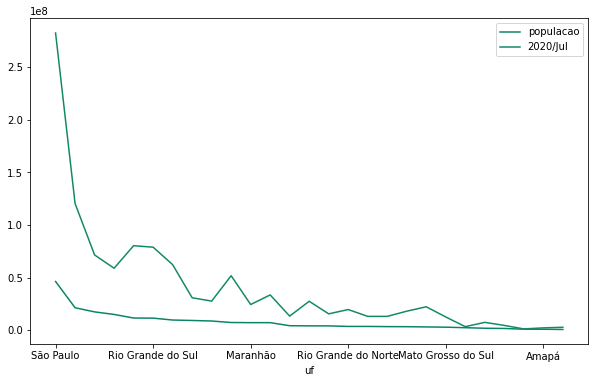

In [ ]:
gastos_e_populacao_2020_Jul.plot(figsize=(10,6))

Este gráfico é ruim para visualização, não só por causa dos valores no eixo x, mas porque estamos comparando duas medidas diferentes em um mesmo eixo: os gastos e a população. 

O que seria uma tentativa de solução é plotar no mesmo gráfico escalas diferentes no eixo y, uma para a população e outra para os gastos. Mas mesmo assim, perderíamos a ideia de proporção entre as duas variáveis.

O gráfico acima também é ruim para identicar proporções. Compare por exemplo São Paulo com Rio Grande do Sul. A diferença em proporção entre os gastos e população parece ser bem maior em São Paulo. Se fizermos a proporção correta usando Python entre os 2 estados, poderemos verificar que as proporções são bem parecidas. A proporção de São Paulo chega até a ser menor!

In [ ]:
proporcao_SP = gastos_e_populacao_2020_Jul['2020/Jul'].loc['São Paulo'] / gastos_e_populacao_2020_Jul['populacao'].loc['São Paulo'] 
proporcao_RS = gastos_e_populacao_2020_Jul['2020/Jul'].loc['Rio Grande do Sul'] / gastos_e_populacao_2020_Jul['populacao'].loc['Rio Grande do Sul'] 

print('proporção de gastos por habitante:\n')
print(f'São Paulo = {proporcao_SP}')
print(f'Rio Grande do Sul = {proporcao_RS}')

proporção de gastos por habitante:

São Paulo = 6.107445322446102
Rio Grande do Sul = 6.909733902899009


Vamos agora adicionar uma nova coluna ao dataframe, com as informações das proporções.

In [ ]:
gastos_e_populacao_2020_Jul['gastos por habitante'] = gastos_e_populacao_2020_Jul['2020/Jul'] / gastos_e_populacao_2020_Jul['populacao']
gastos_e_populacao_2020_Jul.head()

,populacao,2020/Jul,gastos por habitante
uf,,,
São Paulo,46289333,2.827096e+08,6.107445
Minas Gerais,21292666,1.204672e+08,5.657685
Rio de Janeiro,17366189,7.154023e+07,4.119512
Bahia,14930634,5.889810e+07,3.944782
Paraná,11516840,8.032085e+07,6.974209


O melhor gráfico para visualizar esse tipo de informação é, naturalmente, o de barras:

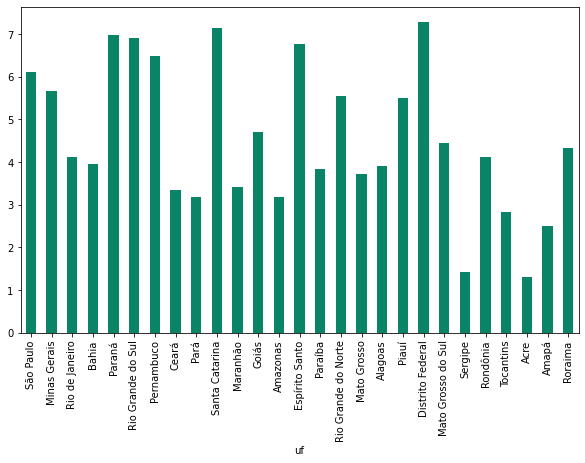

In [ ]:
gastos_e_populacao_2020_Jul['gastos por habitante'].plot(kind='bar', figsize=(10,6))

Retomando o que fizemos nas aulas anteriores, veremos que a ordem dos estados neste gráfico é daqueles que mais gastaram no último mês, do maior para o menor gasto. Essa ordem é vantajosa se quisermos comparar dois estados com gastos próximos.

## Comparando relações entre 2 colunas com scatterplot

Agora, queremos comparar as relações entre os gastos e populações em um gráfico scatterplot. Esse gráfico é muito vantajoso quando queremos analisar a relação matemática entre 2 variáveis. Para fazer esse gráfico, utilizaremos a biblioteca seaborn.

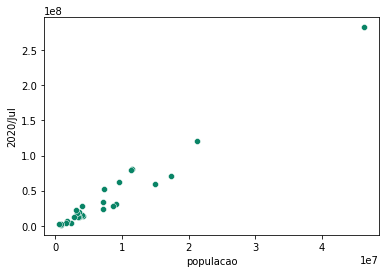

In [ ]:
import seaborn as sns

sns.scatterplot(data=gastos_e_populacao_2020_Jul, x='populacao', y='2020/Jul')

Logo podemos visualizar a relação direta entre as duas variáveis, que já sabíamos: quanto maior a população, maiores serão os gastos. Para melhorar a visualização, vamos aumentar o tamanho do gráfico e alterar a dimensão das escalas, para milhões de habitantes e milhões de reais.

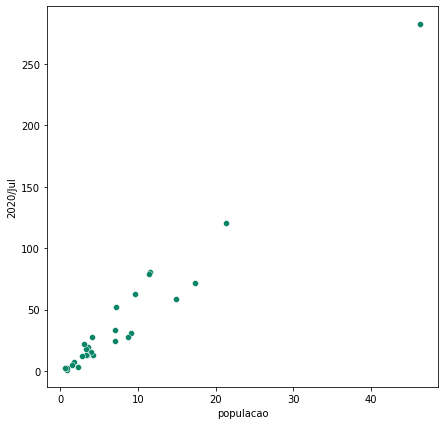

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_e_populacao_2020_Jul/1000000, x='populacao', y='2020/Jul')

Vendo o gráfico sem ler as escalas, a impressão é de que a relação é de 1 pra 1, ou seja, para cada habitante há um gasto de um real, mas isso não é verdade. Uma melhor visualização pode ser feita se igualarmos as escalas nos dois eixos. Poderemos ver que a variação de gastos é bem mais sensível à população.

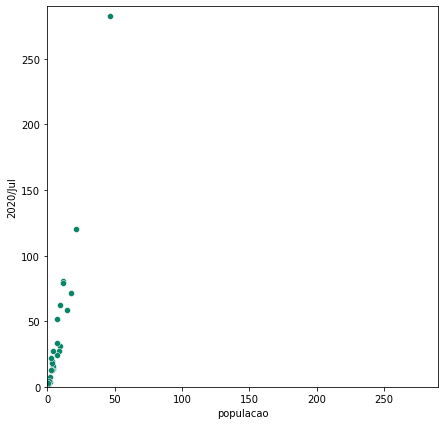

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.ylim(0,290)
plt.xlim(0,290)
sns.scatterplot(data=gastos_e_populacao_2020_Jul/1000000, x='populacao', y='2020/Jul')

Agora, vamos considerar a relação entre gastos por população e a quantidade de habitantes:

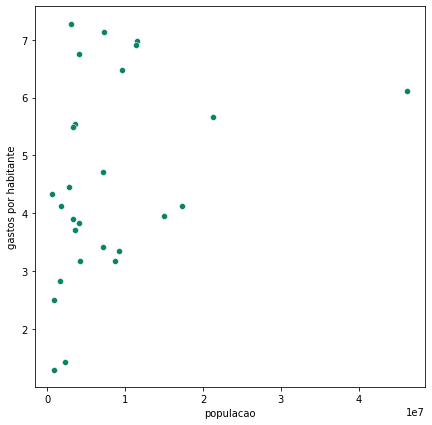

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_e_populacao_2020_Jul, x='populacao', y='gastos por habitante')

Aqui não parece haver nenhuma relação evidente, mas esse gráfico nos diz uma coisa: parece que quando o estado é bastante populoso, a tendência é ele **não** ter uma razão de gastos por habitante baixa.

## Analisando gastos de meses anteriores

Todos os gráficos feitos neste notebook dizem respeito ao mês de Julho de 2020. Desejamos fazer essa mesma análise para meses anteriores e compará-los.

Para isso, vamos definir a função `gastos_e_gastos_por_habitante()`, que recebe as variáveis `gastos`, que deve fornecer os gastos para todos os meses, `dados`, que deverá conter a informação dos habitantes de cada estado, e `mês`, que é o mês ao qual queremos extrair as informações.

A função extrai do dataframe os gastos do mês que queremos e adiciona ao dataframe `gastos_e_populacao`, que criaremos para executar a função. Além dos gastos, será adicionada mais uma coluna, dos gastos por habitantes do respectivo mês.

In [ ]:
def insere_gastos_e_gastos_por_habitante(dados:pd.DataFrame, gastos:pd.DataFrame, mes:str):
  dados[f'gastos {mes}'] = gastos[mes]
  dados[f'gastos por habitante {mes}'] = gastos[mes] / dados['populacao']
  return dados

Vamos testar primeiramente a função para o mês atual, de Julho de 2020.

In [ ]:
gastos_e_populacao = populacao
insere_gastos_e_gastos_por_habitante(gastos_e_populacao, ordenado_por_total, '2020/Jul')
gastos_e_populacao.head()

,populacao,gastos 2020/Jul,gastos por habitante 2020/Jul
uf,,,
São Paulo,46289333,2.827096e+08,6.107445
Minas Gerais,21292666,1.204672e+08,5.657685
Rio de Janeiro,17366189,7.154023e+07,4.119512
Bahia,14930634,5.889810e+07,3.944782
Paraná,11516840,8.032085e+07,6.974209


Agora, adicionando o mês de Junho:

In [ ]:
insere_gastos_e_gastos_por_habitante(gastos_e_populacao, ordenado_por_total, '2020/Jun')
gastos_e_populacao.head()

,populacao,gastos 2020/Jul,gastos por habitante 2020/Jul,gastos 2020/Jun,gastos por habitante 2020/Jun
uf,,,,,
São Paulo,46289333,2.827096e+08,6.107445,2.990609e+08,6.460686
Minas Gerais,21292666,1.204672e+08,5.657685,1.359776e+08,6.386122
Rio de Janeiro,17366189,7.154023e+07,4.119512,7.760493e+07,4.468737
Bahia,14930634,5.889810e+07,3.944782,6.515930e+07,4.364135
Paraná,11516840,8.032085e+07,6.974209,9.290146e+07,8.066576


Agora podemos plotar os mesmos gráficos, mas comparando os meses de Junho e de Julho.

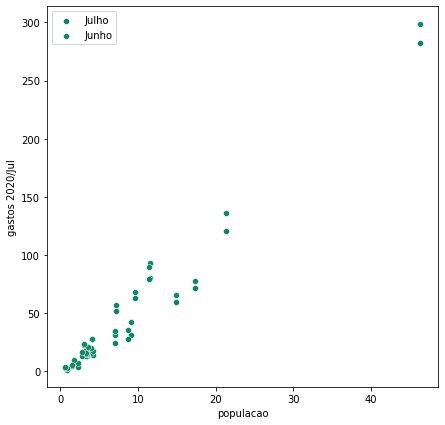

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_e_populacao/1000000, x='populacao', y='gastos 2020/Jul', label='Julho')
sns.scatterplot(data=gastos_e_populacao/1000000, x='populacao', y='gastos 2020/Jun', label='Junho')
plt.legend()

Parece que, em todos os estados, os gastos de Junho para Julho diminuiram. Isso pode ter acontecido porque estão faltando mais dados de Julho serem processados. Vamos continuar nossa análise e incluir o mês de Maio:

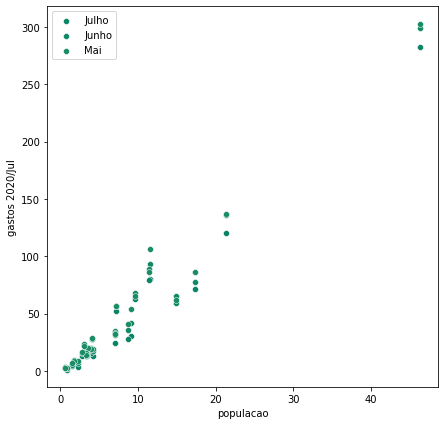

In [ ]:
insere_gastos_e_gastos_por_habitante(gastos_e_populacao, ordenado_por_total, '2020/Mai')

plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_e_populacao/1000000, x='populacao', y='gastos 2020/Jul', label='Julho')
sns.scatterplot(data=gastos_e_populacao/1000000, x='populacao', y='gastos 2020/Jun', label='Junho')
sns.scatterplot(data=gastos_e_populacao/1000000, x='populacao', y='gastos 2020/Mai', label='Mai')
plt.legend()

Parece haver essa tendência de decrescimento nos gastos para os últimos meses. Mas para visualizar melhor esse decrescimento seria melhor o gráfico de linhas, não o gráfico scatterplot.

## Desafios:

### Desafio 01: Ordenar o gráfico e criar uma visualização de gastos por habitantes ordenada.

### Desafio 02 (Super Desafio Gui): Fazer os mesmos gráficos do final da aulas 2.1 para meses anteriores, analisar e compartilhar suas hipóteses.

### Desafio 03 (Super Desafio Thiago): Plotar no mesmos gráficos do final da aula o mês anterior e o mês correte, analisar e compartilhar suas hipóteses.

### Desafio 04: Analise os gráficos e tente chegar a hipóteses que explicam o que você está entendendo dos dados. Lembre-se que a conclusão é uma hipótese. E que esses dados serão alterados.

### Desafio 01: Ordenar o gráfico e criar uma visualização de gastos por habitantes ordenada.

Primeiramente vamos fazer uma mudança na coloração das barras, indicando a ordenação dos estados entre os que tiveram os maiores gastos no total.

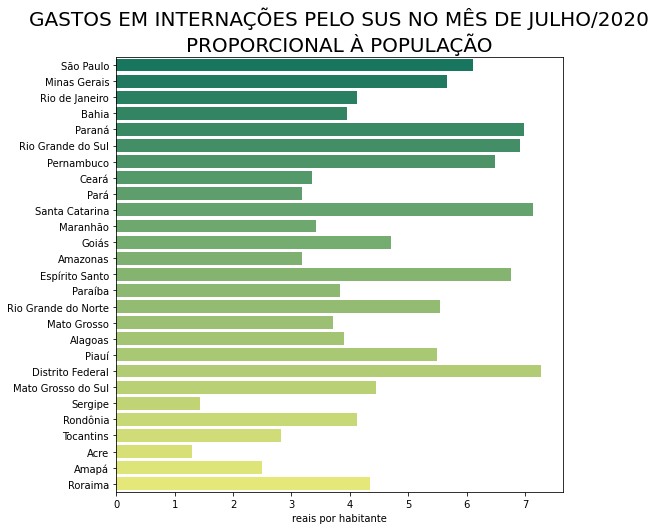

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.set_palette('summer', n_colors=27)
sns.barplot(y=gastos_e_populacao_2020_Jul.index, x=gastos_e_populacao_2020_Jul['gastos por habitante'], orient='h')

plt.ylabel('')
plt.xlabel('reais por habitante')
plt.title('gastos em internações pelo SUS no mês de Julho/2020\nproporcional à população'.upper(), size=20)
plt.show()

# gastos_e_populacao_2020_Jul['gastos por habitante'].plot(kind='barh', figsize=(6,8), colarmap='summer')

o segundo gráfico agora está com a ordenação de gastos por habitante do mês de Julho, e não os gastos totais.

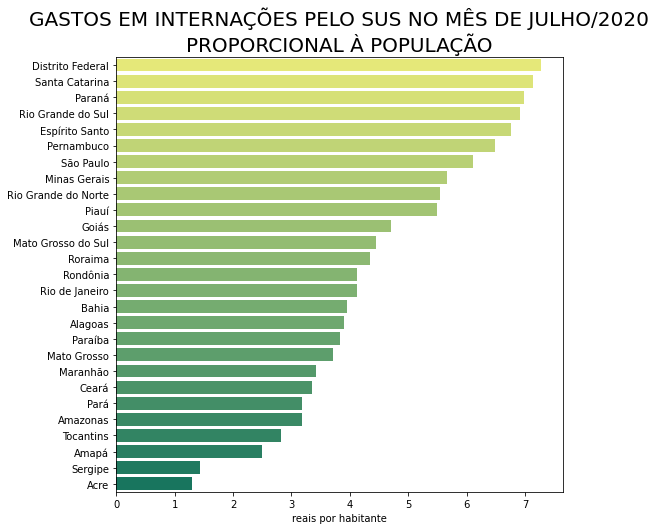

In [ ]:
plt.figure(figsize=(8,8))
sns.set_palette('summer_r', n_colors=27)
gastos_por_habitante_2020_Jul_ordenado = gastos_e_populacao_2020_Jul.sort_values('gastos por habitante', ascending=False)
sns.barplot(y=gastos_por_habitante_2020_Jul_ordenado.index, x=gastos_por_habitante_2020_Jul_ordenado['gastos por habitante'], orient='h')

plt.ylabel('')
plt.xlabel('reais por habitante')
plt.title('gastos em internações pelo SUS no mês de Julho/2020\nproporcional à população'.upper(), size=20)
plt.show()

### Desafio 02 (Super Desafio Gui): Fazer os mesmos gráficos do final da aulas 2.1 para meses anteriores, analisar e compartilhar suas hipóteses.

### Desafio 03 (Super Desafio Thiago): Plotar no mesmos gráficos do final da aula o mês anterior e o mês correte, analisar e compartilhar suas hipóteses.

Esses desafios já foram respondidos mais acima no notebook